In [1]:
# libraries 

import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to calculate this ratio I will...
# 1.) import all the latitudes and longitudes 
# 2.) compile a list of all the unique flight routes 
# 3.) apply a haversine function on the route combinations to determine the distance between location points based off latitudes and longitudes
# 4.) apply a speed ratio

In [2]:
# connecting to the database 

conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

In [3]:
# calling the flights_clean table and saving as a df
query = '''

SELECT * from flights_cleaned

'''

df = pd.read_sql_query(query, conn)
df

,airline,source,destination,total_stops,additional_info,price,day,month,year,arv_hour,...,dep_min,dur_hour,dur_min,total_dur,start,stop_1,stop_2,stop_3,stop_4,stop_5
0,indigo,0,3.0,1,no info,3897,24,3,2019,1,...,20,2,50,170,0,3,32,32,32,32
1,air india,2,0.0,3,no info,7662,1,5,2019,13,...,50,7,25,445,2,23,7,0,32,32
2,jet airways,3,10.0,3,no info,13882,9,6,2019,4,...,25,19,0,1140,3,30,1,10,32,32
3,indigo,2,0.0,2,no info,6218,12,5,2019,23,...,5,5,25,325,2,31,0,32,32,32
4,indigo,0,3.0,2,no info,13302,1,3,2019,21,...,50,4,45,285,0,31,3,32,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,no info,4107,9,4,2019,22,...,55,2,30,150,2,0,32,32,32,32
10677,air india,2,0.0,1,no info,4145,27,4,2019,23,...,45,2,35,155,2,0,32,32,32,32
10678,jet airways,0,3.0,1,no info,7229,27,4,2019,11,...,20,3,0,180,0,3,32,32,32,32
10679,vistara,0,3.0,1,no info,12648,1,3,2019,14,...,30,2,40,160,0,3,32,32,32,32


In [4]:
import csv

conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS location_values')

In [5]:
# creating the table we need 

cursor.execute('''
CREATE TABLE IF NOT EXISTS location_values (
    value INTEGER,
    abrv TEXT,
    city TEXT,
    latitude REAL,
    longitude REAL
)
''')

cursor.execute('''

SELECT 
id.loc_id,
id.abbrv,
il.city,
il.latitude,
il.longitude
FROM locations AS il
JOIN cities as ica
ON il.City = ica.full_name
JOIN location_dict as id 
ON ica.abbreviation = id.abbrv


''')

rows = cursor.fetchall()
for row in rows: 
    print(row)

cursor.executemany('''
INSERT INTO location_values (value, abrv, city, latitude, longitude)
VALUES (?, ?, ?, ?, ?)
''', rows)

# Commit the transaction
conn.commit()

  

(0, 'blr', 'Bangalore', 12.9716, 77.5946)
(1, 'bom', 'Mumbai', 19.076, 72.8777)
(2, 'ccu', 'Kolkata', 22.5726, 88.3639)
(3, 'del', 'Delhi', 28.7041, 77.1025)
(4, 'maa', 'Chennai', 13.0827, 80.2707)
(5, 'amd', 'Ahmedabad', 23.0225, 72.5714)
(6, 'atq', 'Amritsar', 31.634, 74.8723)
(7, 'bbi', 'Bhubaneswar', 20.2961, 85.8245)
(8, 'bdq', 'Vadodara', 22.3072, 73.1812)
(9, 'bho', 'Bhopal', 23.2599, 77.4126)
(10, 'cok', 'Kochi', 9.9312, 76.2673)
(11, 'ded', 'Dehradun', 30.3165, 78.0322)
(12, 'gau', 'Guwahati', 26.1445, 91.7362)
(13, 'goi', 'Goa', 15.2993, 74.124)
(14, 'gwl', 'Gwalior', 26.2183, 78.1828)
(15, 'hbx', 'Hubli', 15.3647, 75.124)
(16, 'hyd', 'Hyderabad', 17.385, 78.4867)
(17, 'idr', 'Indore', 22.7196, 75.8577)
(18, 'imf', 'Imphal', 24.817, 93.9368)
(19, 'isk', 'Nashik', 19.9975, 73.7898)
(20, 'ixa', 'Agartala', 23.8315, 91.2868)
(21, 'ixb', 'Bagdogra', 26.698, 88.3105)
(22, 'ixc', 'Chandigarh', 30.7333, 76.7794)
(23, 'ixr', 'Ranchi', 23.3441, 85.3096)
(24, 'ixu', 'Aurangabad', 19.87

In [7]:
df1

,value,abrv,city,latitude,longitude
0,0,blr,Bangalore,12.9716,77.5946
1,1,bom,Mumbai,19.0760,72.8777
2,2,ccu,Kolkata,22.5726,88.3639
3,3,del,Delhi,28.7041,77.1025
4,4,maa,Chennai,13.0827,80.2707
5,5,amd,Ahmedabad,23.0225,72.5714
6,6,atq,Amritsar,31.6340,74.8723
7,7,bbi,Bhubaneswar,20.2961,85.8245
8,8,bdq,Vadodara,22.3072,73.1812
9,9,bho,Bhopal,23.2599,77.4126


In [ ]:
## now I need to plot all the points and calculate the distances using latitude and longitude 
# this will be accomplished by creating a dictionary out of the table df1 that was just created

In [9]:
# Remove duplicates based on 'value' and keep the first occurrence
location_df_unique = df1.drop_duplicates(subset='value', keep='first')

# Create the dictionary from the unique values
location_dict = location_df_unique.set_index('value')[['abrv', 'latitude', 'longitude']].to_dict('index')
location_dict

{0: {'abrv': 'blr', 'latitude': 12.9716, 'longitude': 77.5946},
 1: {'abrv': 'bom', 'latitude': 19.076, 'longitude': 72.8777},
 2: {'abrv': 'ccu', 'latitude': 22.5726, 'longitude': 88.3639},
 3: {'abrv': 'del', 'latitude': 28.7041, 'longitude': 77.1025},
 4: {'abrv': 'maa', 'latitude': 13.0827, 'longitude': 80.2707},
 5: {'abrv': 'amd', 'latitude': 23.0225, 'longitude': 72.5714},
 6: {'abrv': 'atq', 'latitude': 31.634, 'longitude': 74.8723},
 7: {'abrv': 'bbi', 'latitude': 20.2961, 'longitude': 85.8245},
 8: {'abrv': 'bdq', 'latitude': 22.3072, 'longitude': 73.1812},
 9: {'abrv': 'bho', 'latitude': 23.2599, 'longitude': 77.4126},
 10: {'abrv': 'cok', 'latitude': 9.9312, 'longitude': 76.2673},
 11: {'abrv': 'ded', 'latitude': 30.3165, 'longitude': 78.0322},
 12: {'abrv': 'gau', 'latitude': 26.1445, 'longitude': 91.7362},
 13: {'abrv': 'goi', 'latitude': 15.2993, 'longitude': 74.124},
 14: {'abrv': 'gwl', 'latitude': 26.2183, 'longitude': 78.1828},
 15: {'abrv': 'hbx', 'latitude': 15.364

In [10]:
location_df_unique

,value,abrv,city,latitude,longitude
0,0,blr,Bangalore,12.9716,77.5946
1,1,bom,Mumbai,19.0760,72.8777
2,2,ccu,Kolkata,22.5726,88.3639
3,3,del,Delhi,28.7041,77.1025
4,4,maa,Chennai,13.0827,80.2707
5,5,amd,Ahmedabad,23.0225,72.5714
6,6,atq,Amritsar,31.6340,74.8723
7,7,bbi,Bhubaneswar,20.2961,85.8245
8,8,bdq,Vadodara,22.3072,73.1812
9,9,bho,Bhopal,23.2599,77.4126


In [46]:
## now we need to determine a few more pieces of information...
# 1.) determine all the flight routes (non-stop is our benchmark to determine total plane speeds)
# 2.) compile a collection of distances between all location combinations that are attached to any route utilizing latitude and longitude 
# 3.) determine total air_time for all combinations
# 4.) determine lay over times for all flights greater than 1 stop

In [11]:
# compiling all routes 

# Extract relevant columns for flight routes
route_columns = ['start', 'stop_1', 'stop_2', 'stop_3', 'stop_4', 'stop_5', 'destination']

# dataframe 
unique_routes_df = df[route_columns].drop_duplicates().reset_index(drop=True)


unique_routes_df

,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination
0,0,3,32,32,32,32,3.0
1,2,23,7,0,32,32,0.0
2,3,30,1,10,32,32,10.0
3,2,31,0,32,32,32,0.0
4,0,31,3,32,32,32,3.0
...,...,...,...,...,...,...,...
123,1,41,3,16,32,32,16.0
124,0,15,1,31,3,32,3.0
125,0,1,22,3,32,32,3.0
126,0,2,7,16,40,3,3.0


In [ ]:
# 128 unique routes

In [ ]:
# now lets use our reference dictionary to insert the lats and lon for out destinations and build a new reference df

In [12]:
df2 = unique_routes_df
df2

,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination
0,0,3,32,32,32,32,3.0
1,2,23,7,0,32,32,0.0
2,3,30,1,10,32,32,10.0
3,2,31,0,32,32,32,0.0
4,0,31,3,32,32,32,3.0
...,...,...,...,...,...,...,...
123,1,41,3,16,32,32,16.0
124,0,15,1,31,3,32,3.0
125,0,1,22,3,32,32,3.0
126,0,2,7,16,40,3,3.0


In [13]:
# function to extract the lats and longs and apply them to a data frame

def extract_lat_long(row, column_name):
    location_info = location_dict.get(row[column_name], {})
    return pd.Series([location_info.get('latitude'), location_info.get('longitude')])


# apply the function for each location column and create new columns
location_columns = ['start', 'stop_1', 'stop_2', 'stop_3', 'stop_4', 'stop_5', 'destination']
for col in location_columns:
    df2[[f'{col}_lat', f'{col}_long']] = df2.apply(extract_lat_long, column_name=col, axis=1)


df2

,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination,start_lat,start_long,stop_1_lat,...,stop_2_lat,stop_2_long,stop_3_lat,stop_3_long,stop_4_lat,stop_4_long,stop_5_lat,stop_5_long,destination_lat,destination_long
0,0,3,32,32,32,32,3.0,12.9716,77.5946,28.7041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7041,77.1025
1,2,23,7,0,32,32,0.0,22.5726,88.3639,23.3441,...,20.2961,85.8245,12.9716,77.5946,NaN,NaN,NaN,NaN,12.9716,77.5946
2,3,30,1,10,32,32,10.0,28.7041,77.1025,26.8467,...,19.0760,72.8777,9.9312,76.2673,NaN,NaN,NaN,NaN,9.9312,76.2673
3,2,31,0,32,32,32,0.0,22.5726,88.3639,21.1458,...,12.9716,77.5946,NaN,NaN,NaN,NaN,NaN,NaN,12.9716,77.5946
4,0,31,3,32,32,32,3.0,12.9716,77.5946,21.1458,...,28.7041,77.1025,NaN,NaN,NaN,NaN,NaN,NaN,28.7041,77.1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,41,3,16,32,32,16.0,19.0760,72.8777,25.3176,...,28.7041,77.1025,17.3850,78.4867,NaN,NaN,NaN,NaN,17.3850,78.4867
124,0,15,1,31,3,32,3.0,12.9716,77.5946,15.3647,...,19.0760,72.8777,21.1458,79.0882,28.7041,77.1025,NaN,NaN,28.7041,77.1025
125,0,1,22,3,32,32,3.0,12.9716,77.5946,19.0760,...,30.7333,76.7794,28.7041,77.1025,NaN,NaN,NaN,NaN,28.7041,77.1025
126,0,2,7,16,40,3,3.0,12.9716,77.5946,22.5726,...,20.2961,85.8245,17.3850,78.4867,16.5062,80.6480,28.7041,77.1025,28.7041,77.1025


In [14]:
# haversine function to calculate distance between a pair of latitudes and longitudes 
import math

def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    distance = r * c
    
    return distance

In [15]:
# calculating our distances and building and adding to the dataframe

def calculate_distances(row):
    distances = []
    # Iterate over pairs of consecutive columns except for the last pair since destination is removed
    for i in range(len(location_columns) - 2):  # Exclude the last pair since 'destination' is removed
        lat1, lon1 = row[f'{location_columns[i]}_lat'], row[f'{location_columns[i]}_long']
        lat2, lon2 = row[f'{location_columns[i+1]}_lat'], row[f'{location_columns[i+1]}_long']
        
        # check for NaN values which indicate no further stops
        if pd.notna(lat1) and pd.notna(lon1) and pd.notna(lat2) and pd.notna(lon2):
            distance = haversine(lon1, lat1, lon2, lat2)
            distances.append(distance)
        else:
            distances.append(None)
    return pd.Series(distances)

# apply the function to calculate distances
distance_columns = [f'distance_{i}' for i in range(len(location_columns) - 2)]
df2[distance_columns] = df2.apply(calculate_distances, axis=1)

df2

,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination,start_lat,start_long,stop_1_lat,...,stop_4_long,stop_5_lat,stop_5_long,destination_lat,destination_long,distance_0,distance_1,distance_2,distance_3,distance_4
0,0,3,32,32,32,32,3.0,12.9716,77.5946,28.7041,...,NaN,NaN,NaN,28.7041,77.1025,1750.114762,NaN,NaN,NaN,NaN
1,2,23,7,0,32,32,0.0,22.5726,88.3639,23.3441,...,NaN,NaN,NaN,12.9716,77.5946,324.265052,343.063250,1196.125177,NaN,NaN
2,3,30,1,10,32,32,10.0,28.7041,77.1025,26.8467,...,NaN,NaN,NaN,9.9312,76.2673,430.839854,1194.674740,1080.185688,NaN,NaN
3,2,31,0,32,32,32,0.0,22.5726,88.3639,21.1458,...,NaN,NaN,NaN,12.9716,77.5946,970.132832,922.663070,NaN,NaN,NaN
4,0,31,3,32,32,32,3.0,12.9716,77.5946,21.1458,...,NaN,NaN,NaN,28.7041,77.1025,922.663070,863.912291,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,41,3,16,32,32,16.0,19.0760,72.8777,25.3176,...,NaN,NaN,NaN,17.3850,78.4867,1249.052986,692.737299,1266.530603,NaN,NaN
124,0,15,1,31,3,32,3.0,12.9716,77.5946,15.3647,...,77.1025,NaN,NaN,28.7041,77.1025,376.490532,476.652148,688.019777,863.912291,NaN
125,0,1,22,3,32,32,3.0,12.9716,77.5946,19.0760,...,NaN,NaN,NaN,28.7041,77.1025,845.318386,1354.316711,227.783401,NaN,NaN
126,0,2,7,16,40,3,3.0,12.9716,77.5946,22.5726,...,80.6480,28.7041,77.1025,28.7041,77.1025,1560.696623,364.893069,837.156352,249.793709,1404.053128


In [ ]:
# now I have a more fleshed out route master reference sheet

In [ ]:
# distance_0 = start & stop 1
# distance_1 = stop_1 & stop_2
# distance_2 = stop_2 & stop_3
# distance_3 = stop 3 & stop 4
# distance_4 = stop 4 & stop 5

In [ ]:
# now that we have our total distances broken up, we need to think through applying our speed ratio 
# there is clearly some variance for route duration

In [ ]:
# let's compare all the known routes total_durations distributions

In [16]:
route_columns = ['start', 'stop_1', 'stop_2', 'stop_3', 'stop_4', 'stop_5', 'destination']

# dataframe 
unique_routes_df2 = df[route_columns].drop_duplicates().reset_index(drop=True)
unique_routes_df2

,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination
0,0,3,32,32,32,32,3.0
1,2,23,7,0,32,32,0.0
2,3,30,1,10,32,32,10.0
3,2,31,0,32,32,32,0.0
4,0,31,3,32,32,32,3.0
...,...,...,...,...,...,...,...
123,1,41,3,16,32,32,16.0
124,0,15,1,31,3,32,3.0
125,0,1,22,3,32,32,3.0
126,0,2,7,16,40,3,3.0


In [ ]:
# I will utilize a dictionary to create a new feature... route_number
# 1.) add a key to unique_routes_df2
# 2.) insert the key where a row matches its pattern

In [17]:
# adding a numeric key for all flights

unique_routes_df2.insert(0, 'route', range(1, len(unique_routes_df2) + 1))
unique_routes_df2

,route,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination
0,1,0,3,32,32,32,32,3.0
1,2,2,23,7,0,32,32,0.0
2,3,3,30,1,10,32,32,10.0
3,4,2,31,0,32,32,32,0.0
4,5,0,31,3,32,32,32,3.0
...,...,...,...,...,...,...,...,...
123,124,1,41,3,16,32,32,16.0
124,125,0,15,1,31,3,32,3.0
125,126,0,1,22,3,32,32,3.0
126,127,0,2,7,16,40,3,3.0


In [18]:
# creating the dictionary 

route_dict = unique_routes_df2.set_index('route')[['start', 'stop_1', 'stop_2', 'stop_3','stop_4', 'stop_5']].to_dict('index')
route_dict

{1: {'start': 0,
  'stop_1': 3,
  'stop_2': 32,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 2: {'start': 2,
  'stop_1': 23,
  'stop_2': 7,
  'stop_3': 0,
  'stop_4': 32,
  'stop_5': 32},
 3: {'start': 3,
  'stop_1': 30,
  'stop_2': 1,
  'stop_3': 10,
  'stop_4': 32,
  'stop_5': 32},
 4: {'start': 2,
  'stop_1': 31,
  'stop_2': 0,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 5: {'start': 0,
  'stop_1': 31,
  'stop_2': 3,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 6: {'start': 2,
  'stop_1': 0,
  'stop_2': 32,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 7: {'start': 0,
  'stop_1': 1,
  'stop_2': 3,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 8: {'start': 3,
  'stop_1': 1,
  'stop_2': 10,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 9: {'start': 3,
  'stop_1': 0,
  'stop_2': 10,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 10: {'start': 4,
  'stop_1': 2,
  'stop_2': 32,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 11: {'start': 2,
  'stop_1': 1

In [ ]:
# inserting the route # into the dataframe

In [19]:
def find_route_num(row):
    for key, value in route_dict.items():
        if all(row[column] ==value[column] for column in value):
            return key
    return None

df['route_num'] = df.apply(find_route_num, axis=1)

df

,airline,source,destination,total_stops,additional_info,price,day,month,year,arv_hour,...,dur_hour,dur_min,total_dur,start,stop_1,stop_2,stop_3,stop_4,stop_5,route_num
0,indigo,0,3.0,1,no info,3897,24,3,2019,1,...,2,50,170,0,3,32,32,32,32,1
1,air india,2,0.0,3,no info,7662,1,5,2019,13,...,7,25,445,2,23,7,0,32,32,2
2,jet airways,3,10.0,3,no info,13882,9,6,2019,4,...,19,0,1140,3,30,1,10,32,32,3
3,indigo,2,0.0,2,no info,6218,12,5,2019,23,...,5,25,325,2,31,0,32,32,32,4
4,indigo,0,3.0,2,no info,13302,1,3,2019,21,...,4,45,285,0,31,3,32,32,32,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,no info,4107,9,4,2019,22,...,2,30,150,2,0,32,32,32,32,6
10677,air india,2,0.0,1,no info,4145,27,4,2019,23,...,2,35,155,2,0,32,32,32,32,6
10678,jet airways,0,3.0,1,no info,7229,27,4,2019,11,...,3,0,180,0,3,32,32,32,32,1
10679,vistara,0,3.0,1,no info,12648,1,3,2019,14,...,2,40,160,0,3,32,32,32,32,1


In [ ]:
# now that the flight combinations are categorized, we can plot....all route_num total_dur distributions...all 128 of them

In [20]:
# frequency table of flights per route

pd.crosstab(index = df['route_num'], columns = 'count')

col_0,count
route_num,
1,1552
2,6
3,41
4,9
5,3
...,...
124,1
125,1
126,1


In [21]:
# here I am determining the normallity of the spread of total_dur by comaparing the mean and the median.

def mean_minus_median(group):
    mean_val = group['total_dur'].mean()
    median_val = group['total_dur'].median()
    return mean_val - median_val

# Apply the function to each group of route_num
result = df.groupby('route_num').apply(mean_minus_median).reset_index(name='mean_median_diff')

# Sort the result by 'mean_median_diff'
result_sorted = result.sort_values(by='mean_median_diff')

result_sorted

C:\Users\Epicm\AppData\Local\Temp\ipykernel_35684\3971876567.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('route_num').apply(mean_minus_median).reset_index(name='mean_median_diff')


,route_num,mean_median_diff
82,83,-410.000000
67,68,-331.111111
36,37,-280.384615
119,120,-220.000000
48,49,-194.687500
...,...,...
78,79,326.000000
53,54,351.818182
43,44,352.500000
24,25,479.000000


In [22]:
# first lets get the speed ratios from the non-stop flights we do known

nonstop_routes = [['0', '3'], ['2', '0'], ['1', '16'],['3', '10'],['4', '2']]
unique_routes_df2

,route,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination
0,1,0,3,32,32,32,32,3.0
1,2,2,23,7,0,32,32,0.0
2,3,3,30,1,10,32,32,10.0
3,4,2,31,0,32,32,32,0.0
4,5,0,31,3,32,32,32,3.0
...,...,...,...,...,...,...,...,...
123,124,1,41,3,16,32,32,16.0
124,125,0,15,1,31,3,32,3.0
125,126,0,1,22,3,32,32,3.0
126,127,0,2,7,16,40,3,3.0


In [ ]:
# I will utilize a dictionary to create a new feature... route_number
# 1.) add a key to unique_routes_df2
# 2.) insert the key where a row matches its pattern

In [23]:
# adding a numeric key for all flights

unique_routes_df2.insert(0, 'route', range(1, len(unique_routes_df2) + 1))
unique_routes_df2

ValueError: cannot insert route, already exists

In [24]:
# creating the dictionary 

route_dict = unique_routes_df2.set_index('route')[['start', 'stop_1', 'stop_2', 'stop_3','stop_4', 'stop_5']].to_dict('index')
route_dict

{1: {'start': 0,
  'stop_1': 3,
  'stop_2': 32,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 2: {'start': 2,
  'stop_1': 23,
  'stop_2': 7,
  'stop_3': 0,
  'stop_4': 32,
  'stop_5': 32},
 3: {'start': 3,
  'stop_1': 30,
  'stop_2': 1,
  'stop_3': 10,
  'stop_4': 32,
  'stop_5': 32},
 4: {'start': 2,
  'stop_1': 31,
  'stop_2': 0,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 5: {'start': 0,
  'stop_1': 31,
  'stop_2': 3,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 6: {'start': 2,
  'stop_1': 0,
  'stop_2': 32,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 7: {'start': 0,
  'stop_1': 1,
  'stop_2': 3,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 8: {'start': 3,
  'stop_1': 1,
  'stop_2': 10,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 9: {'start': 3,
  'stop_1': 0,
  'stop_2': 10,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 10: {'start': 4,
  'stop_1': 2,
  'stop_2': 32,
  'stop_3': 32,
  'stop_4': 32,
  'stop_5': 32},
 11: {'start': 2,
  'stop_1': 1

In [25]:
# inserting route_id into the main dataframe.

def find_route_num(row):
    for key, value in route_dict.items():
        if all(row[column] ==value[column] for column in value):
            return key
    return None

df['route_num'] = df.apply(find_route_num, axis=1)

df

,airline,source,destination,total_stops,additional_info,price,day,month,year,arv_hour,...,dur_hour,dur_min,total_dur,start,stop_1,stop_2,stop_3,stop_4,stop_5,route_num
0,indigo,0,3.0,1,no info,3897,24,3,2019,1,...,2,50,170,0,3,32,32,32,32,1
1,air india,2,0.0,3,no info,7662,1,5,2019,13,...,7,25,445,2,23,7,0,32,32,2
2,jet airways,3,10.0,3,no info,13882,9,6,2019,4,...,19,0,1140,3,30,1,10,32,32,3
3,indigo,2,0.0,2,no info,6218,12,5,2019,23,...,5,25,325,2,31,0,32,32,32,4
4,indigo,0,3.0,2,no info,13302,1,3,2019,21,...,4,45,285,0,31,3,32,32,32,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,no info,4107,9,4,2019,22,...,2,30,150,2,0,32,32,32,32,6
10677,air india,2,0.0,1,no info,4145,27,4,2019,23,...,2,35,155,2,0,32,32,32,32,6
10678,jet airways,0,3.0,1,no info,7229,27,4,2019,11,...,3,0,180,0,3,32,32,32,32,1
10679,vistara,0,3.0,1,no info,12648,1,3,2019,14,...,2,40,160,0,3,32,32,32,32,1


In [ ]:
##  now let's predict the total_durs of non-stops flights ##

In [26]:
# importing our routes df into our planes database

df3 = unique_routes_df2

# Connect to SQLite database (or create it)
conn = sqlite3.connect("C:\\Users\\Epicm\\Desktop\\data_bases\\dbs\\planes\\plane1.db")

# Write the DataFrame to a SQL table named 'users'
df3.to_sql('flight_routes', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [27]:
# pulling our non-stop flights


# Connect to the SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("C:\\Users\\Epicm\\Desktop\\data_bases\\dbs\\planes\\plane1.db")

# Create a cursor object
cursor = conn.cursor()

# Execute a simple query (for example, selecting all rows from a table called 'users')
cursor.execute("""

SELECT 
route,
start,
stop_1
FROM flight_routes
WHERE stop_2 is 32

""")

# Fetch all rows from the result
rows = cursor.fetchall()

# Iterate over the rows and print each one
for row in rows:
    print(row)

# Commit the transaction (if there were any changes, like an INSERT/UPDATE)
conn.commit()

# Close the cursor and the connection
cursor.close()
conn.close()

(1, 0, 3)
(6, 2, 0)
(10, 4, 2)
(23, 3, 10)
(28, 1, 16)


In [28]:
print(df[df['route_num'] == 1]['total_dur'].mean())
print(df[df['route_num'] == 6]['total_dur'].mean())
print(df[df['route_num'] == 10]['total_dur'].mean())
print(df[df['route_num'] == 23]['total_dur'].mean())
print(df[df['route_num'] == 28]['total_dur'].mean())

171.2210051546392
152.86602209944752
139.61942257217848
187.88732394366198
87.4718196457327


In [29]:
print(df[df['route_num'] == 1]['total_dur'].median())
print(df[df['route_num'] == 6]['total_dur'].median())
print(df[df['route_num'] == 10]['total_dur'].median())
print(df[df['route_num'] == 23]['total_dur'].median())
print(df[df['route_num'] == 28]['total_dur'].median())

170.0
155.0
140.0
190.0
90.0


In [ ]:
# the means and medians for our non-stop flights are fairly equal indicating normal distribution

In [30]:
# let's add a route_id to our route_distances

df2.insert(0, 'route_id', range(1, len(df2) + 1))

df2

,route_id,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination,start_lat,start_long,...,stop_4_long,stop_5_lat,stop_5_long,destination_lat,destination_long,distance_0,distance_1,distance_2,distance_3,distance_4
0,1,0,3,32,32,32,32,3.0,12.9716,77.5946,...,NaN,NaN,NaN,28.7041,77.1025,1750.114762,NaN,NaN,NaN,NaN
1,2,2,23,7,0,32,32,0.0,22.5726,88.3639,...,NaN,NaN,NaN,12.9716,77.5946,324.265052,343.063250,1196.125177,NaN,NaN
2,3,3,30,1,10,32,32,10.0,28.7041,77.1025,...,NaN,NaN,NaN,9.9312,76.2673,430.839854,1194.674740,1080.185688,NaN,NaN
3,4,2,31,0,32,32,32,0.0,22.5726,88.3639,...,NaN,NaN,NaN,12.9716,77.5946,970.132832,922.663070,NaN,NaN,NaN
4,5,0,31,3,32,32,32,3.0,12.9716,77.5946,...,NaN,NaN,NaN,28.7041,77.1025,922.663070,863.912291,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,1,41,3,16,32,32,16.0,19.0760,72.8777,...,NaN,NaN,NaN,17.3850,78.4867,1249.052986,692.737299,1266.530603,NaN,NaN
124,125,0,15,1,31,3,32,3.0,12.9716,77.5946,...,77.1025,NaN,NaN,28.7041,77.1025,376.490532,476.652148,688.019777,863.912291,NaN
125,126,0,1,22,3,32,32,3.0,12.9716,77.5946,...,NaN,NaN,NaN,28.7041,77.1025,845.318386,1354.316711,227.783401,NaN,NaN
126,127,0,2,7,16,40,3,3.0,12.9716,77.5946,...,80.6480,28.7041,77.1025,28.7041,77.1025,1560.696623,364.893069,837.156352,249.793709,1404.053128


In [31]:
df

,airline,source,destination,total_stops,additional_info,price,day,month,year,arv_hour,...,dur_hour,dur_min,total_dur,start,stop_1,stop_2,stop_3,stop_4,stop_5,route_num
0,indigo,0,3.0,1,no info,3897,24,3,2019,1,...,2,50,170,0,3,32,32,32,32,1
1,air india,2,0.0,3,no info,7662,1,5,2019,13,...,7,25,445,2,23,7,0,32,32,2
2,jet airways,3,10.0,3,no info,13882,9,6,2019,4,...,19,0,1140,3,30,1,10,32,32,3
3,indigo,2,0.0,2,no info,6218,12,5,2019,23,...,5,25,325,2,31,0,32,32,32,4
4,indigo,0,3.0,2,no info,13302,1,3,2019,21,...,4,45,285,0,31,3,32,32,32,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,no info,4107,9,4,2019,22,...,2,30,150,2,0,32,32,32,32,6
10677,air india,2,0.0,1,no info,4145,27,4,2019,23,...,2,35,155,2,0,32,32,32,32,6
10678,jet airways,0,3.0,1,no info,7229,27,4,2019,11,...,3,0,180,0,3,32,32,32,32,1
10679,vistara,0,3.0,1,no info,12648,1,3,2019,14,...,2,40,160,0,3,32,32,32,32,1


In [ ]:
## now our distance references shares the route_id with our main df

In [32]:
import pandasql as ps

In [33]:
q = """

SELECT 
route_id,
distance_0

FROM df2
WHERE stop_2 = 32


"""

In [34]:
r = ps.sqldf(q, locals())
r

,route_id,distance_0
0,1,1750.114762
1,6,1560.696623
2,10,1358.360715
3,23,2089.267638
4,28,621.462850


In [35]:
# all non-stop flights in the df

non_stop = df[df['stop_2'] == 32]
non_stop

,airline,source,destination,total_stops,additional_info,price,day,month,year,arv_hour,...,dur_hour,dur_min,total_dur,start,stop_1,stop_2,stop_3,stop_4,stop_5,route_num
0,indigo,0,3.0,1,no info,3897,24,3,2019,1,...,2,50,170,0,3,32,32,32,32,1
5,spicejet,2,0.0,1,no info,3873,24,6,2019,11,...,2,25,145,2,0,32,32,32,32,6
11,indigo,2,0.0,1,no info,4174,18,4,2019,22,...,2,35,155,2,0,32,32,32,32,6
12,air india,4,2.0,1,no info,4667,24,6,2019,13,...,2,15,135,4,2,32,32,32,32,10
14,indigo,2,0.0,1,no info,4804,24,4,2019,19,...,2,35,155,2,0,32,32,32,32,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10675,spicejet,0,3.0,1,no check-in baggage included,3257,21,5,2019,8,...,2,40,160,0,3,32,32,32,32,1
10676,air asia,2,0.0,1,no info,4107,9,4,2019,22,...,2,30,150,2,0,32,32,32,32,6
10677,air india,2,0.0,1,no info,4145,27,4,2019,23,...,2,35,155,2,0,32,32,32,32,6
10678,jet airways,0,3.0,1,no info,7229,27,4,2019,11,...,3,0,180,0,3,32,32,32,32,1


In [ ]:
# now let's calculate the speed ratio's for all of our non-stop flights
# I will be using sql

In [36]:
q = """

SELECT r.route_id,
r.distance_0,
df.total_dur,
(r.distance_0 / df.total_dur) AS Km_Min
FROM r 
JOIN df
ON r.route_id = df.route_num



"""

In [37]:
r2 = ps.sqldf(q, locals())
r2

,route_id,distance_0,total_dur,Km_Min
0,1,1750.114762,155,11.291063
1,1,1750.114762,155,11.291063
2,1,1750.114762,155,11.291063
3,1,1750.114762,155,11.291063
4,1,1750.114762,155,11.291063
...,...,...,...,...
3486,28,621.462850,95,6.541714
3487,28,621.462850,95,6.541714
3488,28,621.462850,95,6.541714
3489,28,621.462850,95,6.541714


In [ ]:
### START OF 'KM_MIN' AND 'DISTANCE_0' ANALYSIS ###

In [38]:
# checking for ANOVA assumptions 
# normality

mean = r2['Km_Min'].mean()
median = r2['Km_Min'].median()

mean - median

-0.38677786058701

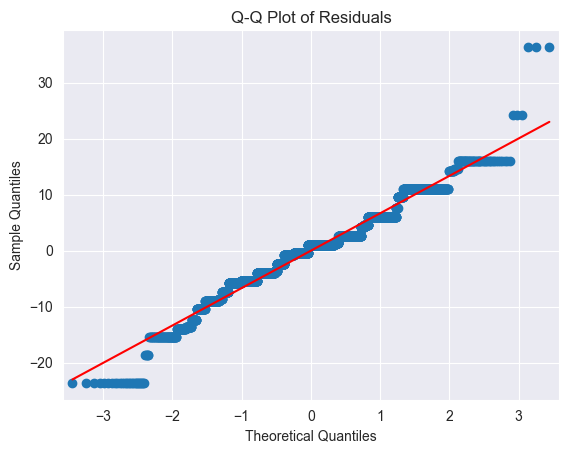

In [39]:
# checking for homogeneity 

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example data
X = r2['distance_0'] # Your independent variables (predictors)
y = r2['total_dur'] # Your dependent variable (response)

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Getting fitted values and residuals
fitted_values = model.fittedvalues
residuals = model.resid

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [40]:
# we will perform a kruskal - wallis 
from scipy.stats import kruskal

group1 = r2[r2['distance_0'] <= 1358 ]['Km_Min']
group2 = r2[r2['distance_0'] > 650]['Km_Min']


H_statistic, p_value = kruskal(group1, group2)
print(f"Kruskal-Wallis H-statistic: {H_statistic}, p-value: {p_value}")

Kruskal-Wallis H-statistic: 1542.2386189900717, p-value: 0.0


In [ ]:
# we have statistical evidence that the median speed ratios are different below and above 650

In [41]:
# may take out 

from scipy.stats import mannwhitneyu

group1 = r2[r2['distance_0'] <= 1358]['Km_Min']
group2 = r2[r2['distance_0'] > 650]['Km_Min']

# Mann-Whitney U Test
U_statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

print(f"Mann-Whitney U statistic: {U_statistic}, p-value: {p_value}")

##

Mann-Whitney U statistic: 72.0, p-value: 0.0


In [42]:
median_group1 = group1.median()
median_group2 = group2.median()

print(f"Median speed ratio for distances <= 650: {median_group1}")
print(f"Median speed ratio for distances > 650: {median_group2}")

Median speed ratio for distances <= 650: 6.905142778622481
Median speed ratio for distances > 650: 10.294792720077705


In [ ]:
"""
The results of the Mann-Whitney U test show that the median speed ratio (Km_Min) is significantly higher for distances greater than 650. This indicates that, on average, speed ratios increase with distance beyond this cutoff, suggesting a possible relationship between longer distances and higher speed ratios
"""

In [ ]:
# Regression Prediction Model #
# this will be used to predict mean total_dur values based on distance

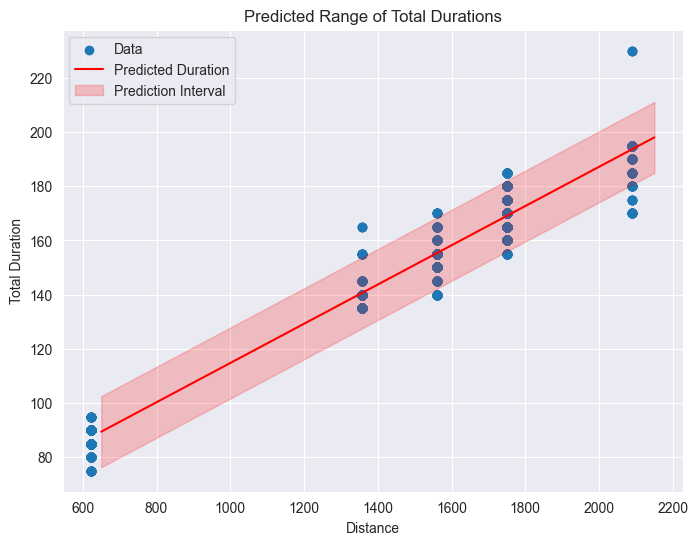

In [43]:
from sklearn.linear_model import LinearRegression

distances = r2['distance_0'].values
durations = r2['total_dur'].values

distances = np.array(distances)
durations = np.array(durations )


# Reshape distances to be 2D
distances_reshaped = distances.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(distances_reshaped, durations)

# Generate predictions and prediction intervals
new_distances = np.arange(650, 2200, 50).reshape(-1, 1)
predicted_durations = model.predict(new_distances)
mean_squared_error = np.mean((durations - model.predict(distances_reshaped))**2)
prediction_interval = 1.96 * np.sqrt(mean_squared_error)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(distances, durations, label='Data')
plt.plot(new_distances, predicted_durations, label='Predicted Duration', color='red')
plt.fill_between(new_distances.flatten(),
                 predicted_durations - prediction_interval,
                 predicted_durations + prediction_interval,
                 color='red', alpha=0.2, label='Prediction Interval')
plt.xlabel('Distance')
plt.ylabel('Total Duration')
plt.title('Predicted Range of Total Durations')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
{
    "coefficients": model.coef_,
    "intercept": model.intercept_,
    "predicted_durations": predicted_durations,
    "mean_squared_error": mean_squared_error,
    "prediction_interval": prediction_interval
}

{'coefficients': array([0.07240056]),
 'intercept': 42.35262585839152,
 'predicted_durations': array([ 89.41299109,  93.03301918,  96.65304728, 100.27307537,
        103.89310347, 107.51313156, 111.13315966, 114.75318775,
        118.37321585, 121.99324394, 125.61327204, 129.23330013,
        132.85332823, 136.47335632, 140.09338441, 143.71341251,
        147.3334406 , 150.9534687 , 154.57349679, 158.19352489,
        161.81355298, 165.43358108, 169.05360917, 172.67363727,
        176.29366536, 179.91369346, 183.53372155, 187.15374965,
        190.77377774, 194.39380584, 198.01383393]),
 'mean_squared_error': 44.594473447256,
 'prediction_interval': 13.088702349544766}

In [ ]:
# slope = 0.0724
# base line duration -> intercept = 42.35
# MSE = 44.59... pretty goof

In [45]:
# r-squared

r_squared = model.score(distances_reshaped, durations)
r_squared

0.956948881069269

In [ ]:
# 95.69% of the variance is explained by the model
# overall good fit

In [ ]:
## End of Regression ##

In [ ]:
## now I need to take my model and...
# 1.) take distance features and predict total duration
# 2.) take the total durations and make total air time

In [46]:
# let's push df2 into our sql server

conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

In [47]:
table_name = 'master flight route'
df2.to_sql(table_name, conn, if_exists='replace', index=False)

128

In [48]:
conn.close()

In [49]:
dfx = df2

# Define the distance features
distance_features = ['distance_0', 'distance_1', 'distance_2', 'distance_3', 'distance_4']

# Function to predict total duration using the regression model
def predict_total_duration(distance):
    return model.predict([[distance]])[0]

# Iterate through each row in the DataFrame
for index, row in df2.iterrows():
    for distance_feature in distance_features:
        # Check if the distance feature is not NaN
        if not pd.isna(row[distance_feature]):
            # Predict the total duration
            total_duration = predict_total_duration(row[distance_feature])
            # Add the predicted total duration as a new column
            df2.loc[index, f'{distance_feature}_total_dur'] = total_duration

# Display the updated DataFrame
df2.head()

,route_id,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination,start_lat,start_long,...,distance_0,distance_1,distance_2,distance_3,distance_4,distance_0_total_dur,distance_1_total_dur,distance_2_total_dur,distance_3_total_dur,distance_4_total_dur
0,1,0,3,32,32,32,32,3.0,12.9716,77.5946,...,1750.114762,NaN,NaN,NaN,NaN,169.061918,NaN,NaN,NaN,NaN
1,2,2,23,7,0,32,32,0.0,22.5726,88.3639,...,324.265052,343.063250,1196.125177,NaN,NaN,65.829598,67.190598,128.952761,NaN,NaN
2,3,3,30,1,10,32,32,10.0,28.7041,77.1025,...,430.839854,1194.674740,1080.185688,NaN,NaN,73.545673,128.847748,120.558677,NaN,NaN
3,4,2,31,0,32,32,32,0.0,22.5726,88.3639,...,970.132832,922.663070,NaN,NaN,NaN,112.590788,109.153951,NaN,NaN,NaN
4,5,0,31,3,32,32,32,3.0,12.9716,77.5946,...,922.663070,863.912291,NaN,NaN,NaN,109.153951,104.900361,NaN,NaN,NaN


In [78]:
df2

,route_id,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination,start_lat,start_long,...,distance_0,distance_1,distance_2,distance_3,distance_4,distance_0_total_dur,distance_1_total_dur,distance_2_total_dur,distance_3_total_dur,distance_4_total_dur
0,1,0,3,32,32,32,32,3.0,12.9716,77.5946,...,1750.114762,NaN,NaN,NaN,NaN,169.061918,NaN,NaN,NaN,NaN
1,2,2,23,7,0,32,32,0.0,22.5726,88.3639,...,324.265052,343.063250,1196.125177,NaN,NaN,65.829598,67.190598,128.952761,NaN,NaN
2,3,3,30,1,10,32,32,10.0,28.7041,77.1025,...,430.839854,1194.674740,1080.185688,NaN,NaN,73.545673,128.847748,120.558677,NaN,NaN
3,4,2,31,0,32,32,32,0.0,22.5726,88.3639,...,970.132832,922.663070,NaN,NaN,NaN,112.590788,109.153951,NaN,NaN,NaN
4,5,0,31,3,32,32,32,3.0,12.9716,77.5946,...,922.663070,863.912291,NaN,NaN,NaN,109.153951,104.900361,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,1,41,3,16,32,32,16.0,19.0760,72.8777,...,1249.052986,692.737299,1266.530603,NaN,NaN,132.784764,92.507196,134.050153,NaN,NaN
124,125,0,15,1,31,3,32,3.0,12.9716,77.5946,...,376.490532,476.652148,688.019777,863.912291,NaN,69.610752,76.862509,92.165644,104.900361,NaN
125,126,0,1,22,3,32,32,3.0,12.9716,77.5946,...,845.318386,1354.316711,227.783401,NaN,NaN,103.554152,140.405917,58.844272,NaN,NaN
126,127,0,2,7,16,40,3,3.0,12.9716,77.5946,...,1560.696623,364.893069,837.156352,249.793709,1404.053128,155.347938,68.771089,102.963216,60.437831,144.006861


In [ ]:
# now I have the mean total_durs for each distance in a route

In [51]:
# building 'total_air_time' out of the newly calculated total_dur

# final reference table 


df2['total_air_time'] = df2[
    ['distance_0_total_dur', 'distance_1_total_dur', 'distance_2_total_dur', 'distance_3_total_dur', 'distance_4_total_dur']
].sum(axis=1, skipna=True)

df2

,route_id,start,stop_1,stop_2,stop_3,stop_4,stop_5,destination,start_lat,start_long,...,distance_1,distance_2,distance_3,distance_4,distance_0_total_dur,distance_1_total_dur,distance_2_total_dur,distance_3_total_dur,distance_4_total_dur,total_air_time
0,1,0,3,32,32,32,32,3.0,12.9716,77.5946,...,NaN,NaN,NaN,NaN,169.061918,NaN,NaN,NaN,NaN,169.061918
1,2,2,23,7,0,32,32,0.0,22.5726,88.3639,...,343.063250,1196.125177,NaN,NaN,65.829598,67.190598,128.952761,NaN,NaN,261.972956
2,3,3,30,1,10,32,32,10.0,28.7041,77.1025,...,1194.674740,1080.185688,NaN,NaN,73.545673,128.847748,120.558677,NaN,NaN,322.952098
3,4,2,31,0,32,32,32,0.0,22.5726,88.3639,...,922.663070,NaN,NaN,NaN,112.590788,109.153951,NaN,NaN,NaN,221.744739
4,5,0,31,3,32,32,32,3.0,12.9716,77.5946,...,863.912291,NaN,NaN,NaN,109.153951,104.900361,NaN,NaN,NaN,214.054312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,1,41,3,16,32,32,16.0,19.0760,72.8777,...,692.737299,1266.530603,NaN,NaN,132.784764,92.507196,134.050153,NaN,NaN,359.342113
124,125,0,15,1,31,3,32,3.0,12.9716,77.5946,...,476.652148,688.019777,863.912291,NaN,69.610752,76.862509,92.165644,104.900361,NaN,343.539267
125,126,0,1,22,3,32,32,3.0,12.9716,77.5946,...,1354.316711,227.783401,NaN,NaN,103.554152,140.405917,58.844272,NaN,NaN,302.804341
126,127,0,2,7,16,40,3,3.0,12.9716,77.5946,...,364.893069,837.156352,249.793709,1404.053128,155.347938,68.771089,102.963216,60.437831,144.006861,531.526935


In [ ]:
# pushing the reference table to our databse

In [52]:
conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

In [53]:
table_name = 'master_flight_route'
df2.to_sql(table_name, conn, if_exists='replace', index=False)

128

In [54]:
conn.close()

In [85]:
# Now that I have total mean air time for individual routes, I can insert it into my df 
# 1.) update flights_clean with route_id
# 2.) query the new table 

In [55]:
conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

In [56]:
table_name = 'flights_cleaned'
df.to_sql(table_name, conn, if_exists='replace', index=False)

10681

In [57]:
conn.close()

In [58]:
conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

In [59]:
# this query is taking all of our columns from flights_cleaned table and joining on the master flight route reference table to merge total_air_time

query = """

SELECT 
    fc.*,
    mfr.total_air_time
FROM
    flights_cleaned AS fc
JOIN 
    master_flight_route AS mfr
ON 
    fc.route_num = mfr.route_id

"""
         

In [60]:
dfx = pd.read_sql_query(query, conn)
dfx

,airline,source,destination,total_stops,additional_info,price,day,month,year,arv_hour,...,dur_min,total_dur,start,stop_1,stop_2,stop_3,stop_4,stop_5,route_num,total_air_time
0,indigo,0,3.0,1,no info,3897,24,3,2019,1,...,50,170,0,3,32,32,32,32,1,169.061918
1,air india,2,0.0,3,no info,7662,1,5,2019,13,...,25,445,2,23,7,0,32,32,2,261.972956
2,jet airways,3,10.0,3,no info,13882,9,6,2019,4,...,0,1140,3,30,1,10,32,32,3,322.952098
3,indigo,2,0.0,2,no info,6218,12,5,2019,23,...,25,325,2,31,0,32,32,32,4,221.744739
4,indigo,0,3.0,2,no info,13302,1,3,2019,21,...,45,285,0,31,3,32,32,32,5,214.054312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,no info,4107,9,4,2019,22,...,30,150,2,0,32,32,32,32,6,155.347938
10677,air india,2,0.0,1,no info,4145,27,4,2019,23,...,35,155,2,0,32,32,32,32,6,155.347938
10678,jet airways,0,3.0,1,no info,7229,27,4,2019,11,...,0,180,0,3,32,32,32,32,1,169.061918
10679,vistara,0,3.0,1,no info,12648,1,3,2019,14,...,40,160,0,3,32,32,32,32,1,169.061918


In [61]:
# now I can build layover_time

dfx['layover_time'] = dfx['total_dur'] - dfx['total_air_time']

dfx

,airline,source,destination,total_stops,additional_info,price,day,month,year,arv_hour,...,total_dur,start,stop_1,stop_2,stop_3,stop_4,stop_5,route_num,total_air_time,layover_time
0,indigo,0,3.0,1,no info,3897,24,3,2019,1,...,170,0,3,32,32,32,32,1,169.061918,0.938082
1,air india,2,0.0,3,no info,7662,1,5,2019,13,...,445,2,23,7,0,32,32,2,261.972956,183.027044
2,jet airways,3,10.0,3,no info,13882,9,6,2019,4,...,1140,3,30,1,10,32,32,3,322.952098,817.047902
3,indigo,2,0.0,2,no info,6218,12,5,2019,23,...,325,2,31,0,32,32,32,4,221.744739,103.255261
4,indigo,0,3.0,2,no info,13302,1,3,2019,21,...,285,0,31,3,32,32,32,5,214.054312,70.945688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,air asia,2,0.0,1,no info,4107,9,4,2019,22,...,150,2,0,32,32,32,32,6,155.347938,-5.347938
10677,air india,2,0.0,1,no info,4145,27,4,2019,23,...,155,2,0,32,32,32,32,6,155.347938,-0.347938
10678,jet airways,0,3.0,1,no info,7229,27,4,2019,11,...,180,0,3,32,32,32,32,1,169.061918,10.938082
10679,vistara,0,3.0,1,no info,12648,1,3,2019,14,...,160,0,3,32,32,32,32,1,169.061918,-9.061918


In [ ]:
### now I have the ability to more accuretly determine the categories of layovers for a flight.

In [62]:
conn = sqlite3.connect(r"C:\Users\Epicm\Desktop\data_bases\dbs\planes\plane1.db")
cursor = conn.cursor()

In [63]:
table_name = 'flights_cleaned'
dfx.to_sql(table_name, conn, if_exists='replace', index=False)

10681

In [64]:
conn.close()